In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..\..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import matplotlib.pyplot as plt
import jax
from jax import vmap
import jax.numpy as jnp

from src.spread import v_margrabe, margrabe_gammas, margrabe_cross_gamma, margrabe_deltas, margrabe
import scienceplots

plt.style.use(['science','no-latex'])

In [3]:
spots_1_range = jnp.arange(80, 200, 10, dtype=jnp.float32)
spots_2_range = jnp.arange(80, 200, 10, dtype=jnp.float32)
spots_1, spots_2 = jnp.meshgrid(spots_1_range, spots_2_range)

In [4]:
vmap_margrabe = vmap(margrabe, in_axes=(0, 0, None, None, None, None))
v_vmap_margrabe = jax.vmap(vmap_margrabe, in_axes=(0, 0, None, None, None, None))

In [5]:
sigma_1 = 0.2
sigma_2 = 0.3
corr = 0.5
expires = 1.0

In [8]:
prices = v_vmap_margrabe(spots_1, spots_2, sigma_1, sigma_2, corr, expires)

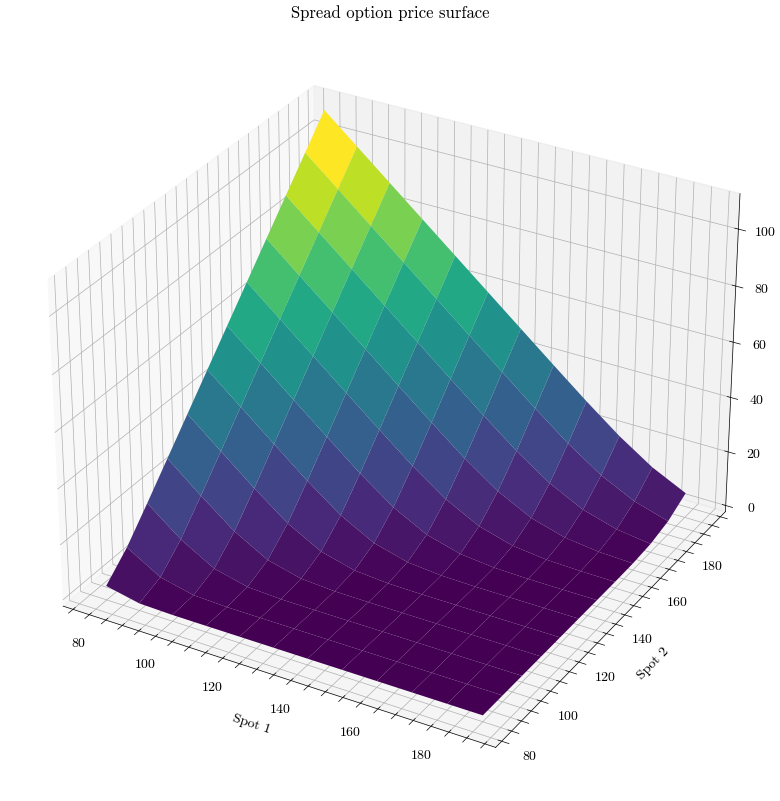

In [9]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(spots_1, spots_2, prices, cmap='viridis')
ax.set_title('Spread option price surface')
ax.set_xlabel('Spot 1')
ax.set_ylabel('Spot 2')
ax.set_zlabel('Price')
plt.show()

## Spread Greeks at time $T = 1.0$

### $\Delta_1$ and $\Delta_2$

In [10]:
v_margrabe_delta = vmap(margrabe_deltas, in_axes=(0, 0, None, None, None, None))
v_v_margrabe_delta = vmap(v_margrabe_delta, in_axes=(0, 0, None, None, None, None))

In [11]:
deltas = jnp.asarray(v_v_margrabe_delta(spots_1, spots_2, expires, sigma_1, sigma_2, corr)).transpose(1, 0, 2)

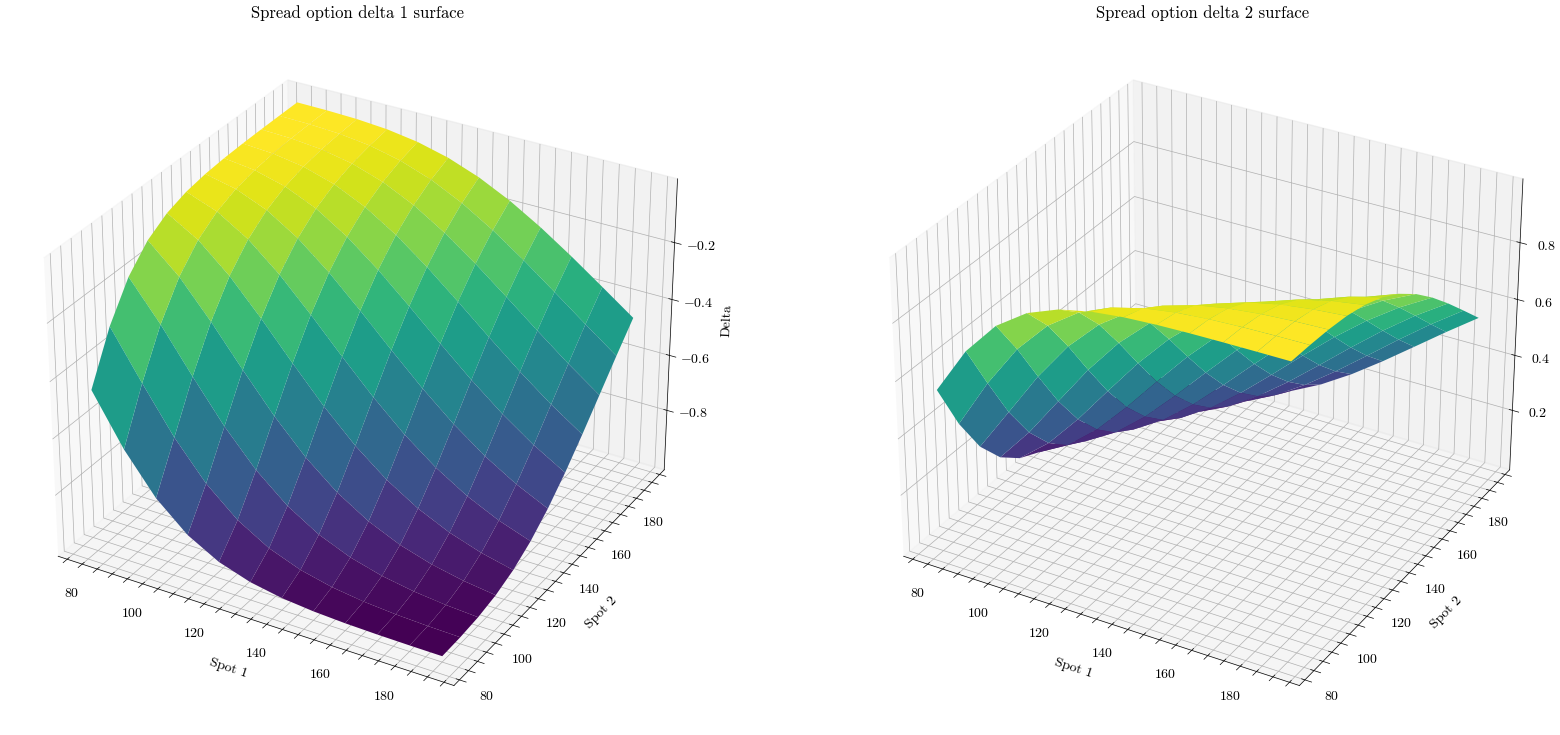

In [12]:
# Plot the delta surfaces
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121, projection='3d')

ax.plot_surface(spots_1, spots_2, deltas[:, :, 0], cmap='viridis')
ax.set_title('Spread option delta 1 surface')
ax.set_xlabel('Spot 1')
ax.set_ylabel('Spot 2')
ax.set_zlabel('Delta')

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(spots_1, spots_2, deltas[:, :, 1], cmap='viridis')
ax.set_title('Spread option delta 2 surface')
ax.set_xlabel('Spot 1')
ax.set_ylabel('Spot 2')
ax.set_zlabel('Delta')
plt.show()

### $\Gamma_{11}$ and $\Gamma_{22}$

In [13]:
v_margrabe_gamma = vmap(margrabe_gammas, in_axes=(0, 0, None, None, None, None))
v_v_margrabe_gamma = vmap(v_margrabe_gamma, in_axes=(0, 0, None, None, None, None))

In [14]:
gammas = jnp.asarray(v_v_margrabe_gamma(spots_1, spots_2, expires, sigma_1, sigma_2, corr)).transpose(1, 0, 2)

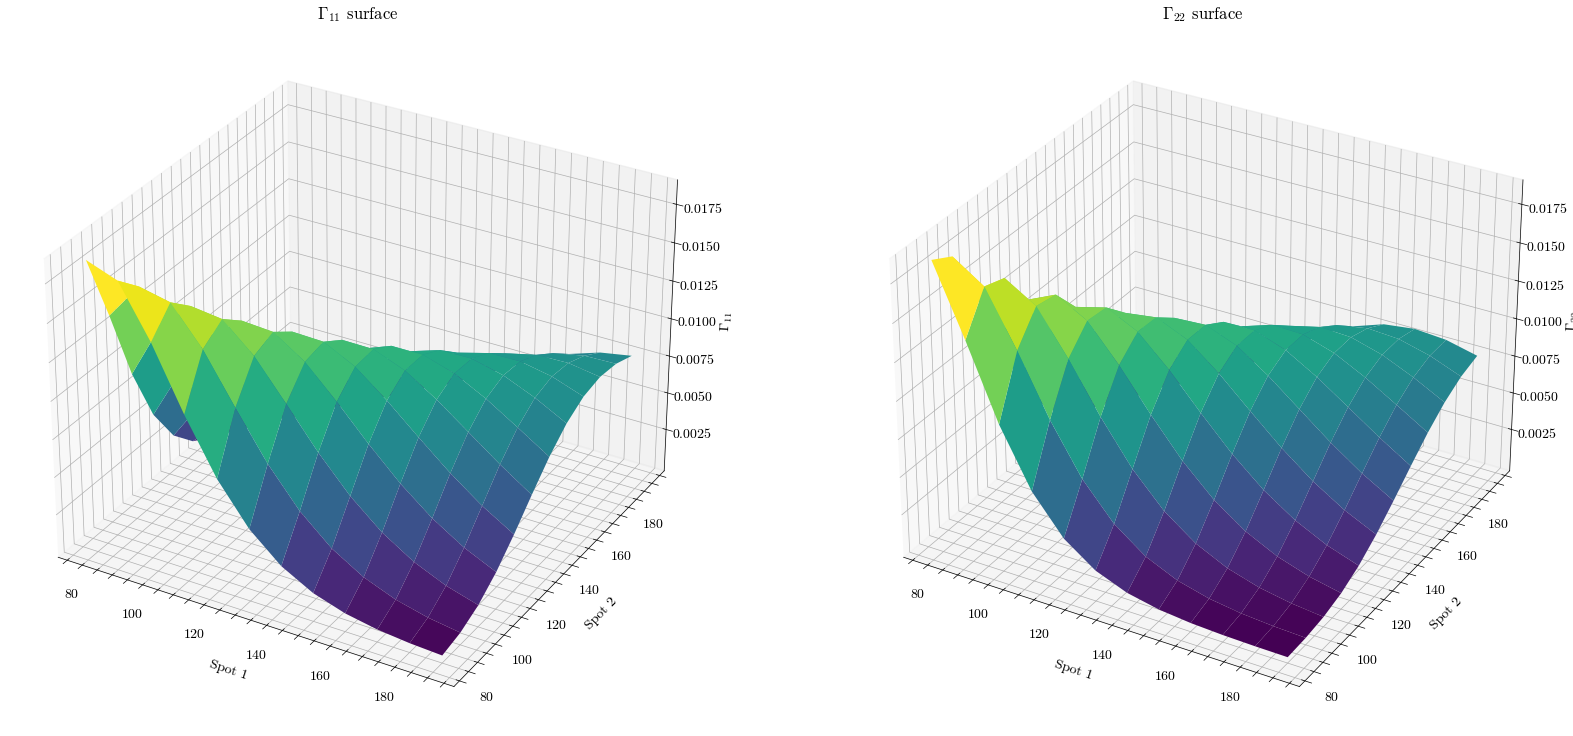

In [15]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

ax1.plot_surface(spots_1, spots_2, gammas[:, :, 0], cmap='viridis')
ax1.set_title(r'$\Gamma_{11}$ surface')
ax1.set_xlabel('Spot 1')
ax1.set_ylabel('Spot 2')
ax1.set_zlabel(r'$\Gamma_{11}$')

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.plot_surface(spots_1, spots_2, gammas[:, :, 1], cmap='viridis')
ax.set_title(r'$\Gamma_{22}$ surface')
ax.set_xlabel('Spot 1')
ax.set_ylabel('Spot 2')
ax.set_zlabel(r'$\Gamma_{22}$')


plt.show()

### $\Gamma_{12}$

In [16]:
v_cross_gamma = vmap(margrabe_cross_gamma, in_axes=(0, 0, None, None, None, None))
v_v_cross_gamma = vmap(v_cross_gamma, in_axes=(0, 0, None, None, None, None))

In [17]:
cross_gammas = jnp.asarray(v_v_cross_gamma(spots_1, spots_2, expires, sigma_1, sigma_2, corr)).transpose(1, 0, 2)

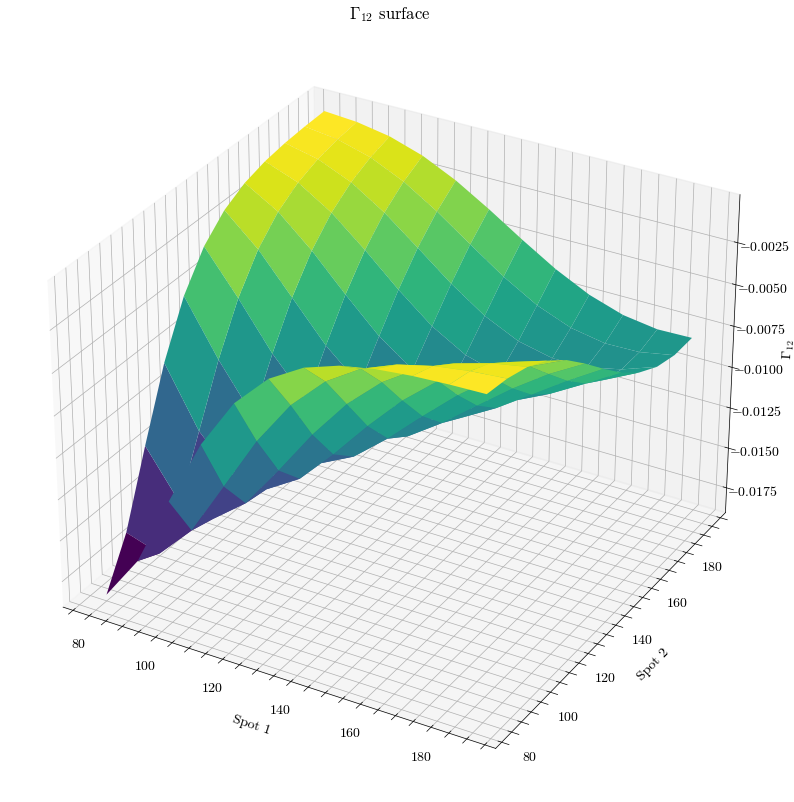

In [18]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(spots_1, spots_2, cross_gammas[:, :, 0], cmap='viridis')
ax.set_title(r'$\Gamma_{12}$ surface')
ax.set_xlabel('Spot 1')
ax.set_ylabel('Spot 2')
ax.set_zlabel(r'$\Gamma_{12}$')

plt.show()